In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

from pytrends.request import TrendReq

In [10]:
plt.rcParams.update({'font.size': 22})

In [2]:
pytrends = TrendReq(hl='en-US', tz=300)
grouper = pd.Grouper(level='date', freq='M')

In [3]:
def get_keyword_to_time_series(keywords):
    keyword_to_time_series = {}
    for keyword in keywords:
        print(keyword)
        pytrends.build_payload([keyword], cat=0, timeframe='today 5-y', geo='US-MA')
        pytrends_df = pytrends.interest_over_time()
        pytrends_monthly_df = pytrends_df.groupby(grouper)[keyword].mean().reset_index()
        time_series = np.array(pytrends_monthly_df[keyword])
        keyword_to_time_series[keyword] = time_series
    return keyword_to_time_series

In [4]:
buyer_df = pd.read_csv('buyer_keyword_report.csv')
seller_df = pd.read_csv('seller_keyword_report.csv')

def convert_to_int(s):
    return int(''.join(x for x in s if x.isdigit()))
buyer_df['Impr.'] = buyer_df['Impr.'].apply(convert_to_int)
seller_df['Impr.'] = seller_df['Impr.'].apply(convert_to_int)

In [5]:
seller_df_sorted = seller_df.sort_values('Impr.', ascending=False)
seller_df_sorted = seller_df_sorted[seller_df_sorted['Keyword'].notna()]

In [6]:
seller_df_sorted.head(100)

,Keyword,Match type,Impr.,Interactions,Interaction rate,Conv. rate
196,zillow,Broad match,295958,"16,464",5.56%,0.80%
1551,+home +prices,Broad match,271729,"13,287",4.89%,4.85%
1080,+house +appraisal,Broad match,206884,"8,268",4.00%,12.92%
924,+real +estate +agents,Broad match,204699,"10,784",5.27%,2.32%
687,+home +prices,Broad match,201191,"11,532",5.73%,2.42%
95,sold home prices,Broad match,169904,"7,861",4.63%,2.86%
2207,"""property value""",Phrase match,162119,"10,202",6.29%,9.85%
2098,+home +values,Broad match,138880,"8,499",6.12%,8.30%
412,real estate values,Broad match,135623,"7,794",5.75%,3.72%
2115,+value of +home,Broad match,133140,"8,306",6.24%,9.49%


In [8]:
seller_keywords = ['zillow', 'home price', 'house price', 'house appraisal', 'real estate agent',
                   'property value', 'home value', 'real estate value', 'value of home', 'fsbo',
                   'real estate commission', 'sell home', 'sell house', 'trulia',
                   'homes.com']

zillow
trulia
realtor.com
redfin


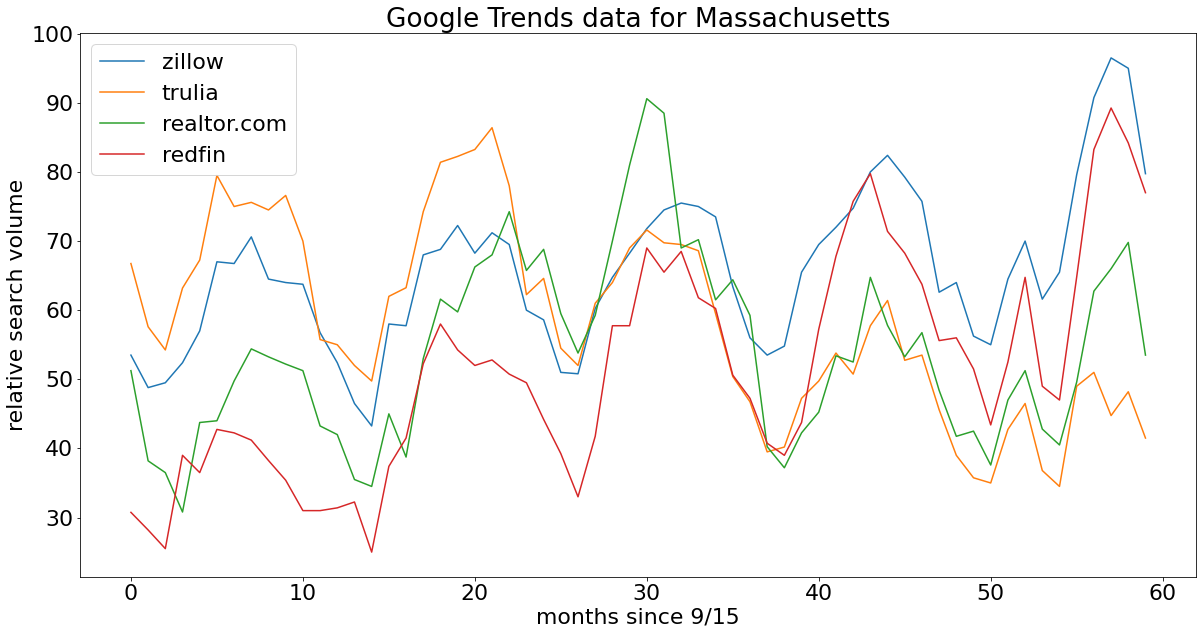

In [19]:
keyword_to_time_series = get_keyword_to_time_series(['zillow', 'trulia', 'realtor.com',
                                                     'redfin'])

plt.figure(figsize=(20, 10))
for keyword, time_series in keyword_to_time_series.items():
    plt.plot(time_series, label=keyword)
plt.xlabel('months since 9/15')
plt.ylabel('relative search volume')
plt.title('Google Trends data for Massachusetts')
plt.legend()
plt.show()

In [148]:
time_series_matrix = np.array([time_series for time_series in keyword_to_time_series.values()])

In [153]:
correlation_matrix = np.corrcoef(time_series_matrix)
for i in range(len(correlation_matrix)):
    print(correlation_matrix[i, :])
    print()

[ 1.          0.45917591  0.57435493  0.52518355  0.621289    0.28201433
  0.6515604  -0.03243925  0.15184077  0.25034373  0.42015978  0.43361322
  0.43610361  0.06978211 -0.16072156]

[ 0.45917591  1.          0.42557933  0.28765562  0.12525282  0.07554944
  0.41025108 -0.02877755  0.07108457 -0.00457902  0.25873053  0.21420654
  0.14238537 -0.19161639 -0.21677753]

[ 0.57435493  0.42557933  1.          0.26815976  0.2445099   0.2237453
  0.36894776 -0.13695614  0.1598357   0.05040338  0.14491523  0.18878896
  0.08158531 -0.11500054 -0.40700221]

[0.52518355 0.28765562 0.26815976 1.         0.40559871 0.13414714
 0.42087392 0.06662548 0.07996499 0.14026435 0.19089977 0.25636391
 0.33163749 0.14551241 0.08937297]

[0.621289   0.12525282 0.2445099  0.40559871 1.         0.26205429
 0.35953467 0.05837961 0.27350134 0.02528733 0.33045009 0.28970352
 0.43978267 0.08596111 0.04843435]

[ 0.28201433  0.07554944  0.2237453   0.13414714  0.26205429  1.
  0.27922415  0.13771663  0.06832726  0.0

In [39]:
buyer_df_sorted = buyer_df.sort_values('Impr.', ascending=False)
buyer_df_sorted = buyer_df_sorted[buyer_df_sorted['Keyword'].notna()]

In [41]:
buyer_df_sorted.head(300)

,Keyword,Match type,Impr.,Interactions,Interaction rate,Conv. rate
7458,"""properties for sale""",Phrase match,13322,271,2.03%,1.11%
5809,"""properties for sale""",Phrase match,9830,174,1.77%,1.15%
5881,"""homes for sales""",Phrase match,4833,134,2.77%,0.00%
5870,"""homes for sale""",Phrase match,3870,138,3.57%,1.45%
7093,"""for sale by owner""",Phrase match,3802,450,11.84%,0.67%
3217,"""properties for sale""",Phrase match,3673,109,2.97%,4.59%
6634,"""properties for sale""",Phrase match,3069,102,3.32%,0.00%
4789,"""homes for sale""",Phrase match,2828,175,6.19%,0.57%
4794,"""homes for sales""",Phrase match,2561,185,7.22%,1.08%
1614,"""homes for sale""",Phrase match,2432,104,4.28%,1.92%
